### Classification 

 Link to source file : https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv
 
 1) We have considered the train.csv file for our classification project.
 
 2) The test.csv file did not have the target columns which would make it difficult to find the accuracy of the models.
 
 3) Our aim is to predict the price intensity of the Mobile phones based on its features.
 
 4) We built KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree models on our dataset.
 
5) Grid SearchCv was used to find the best hyperparameters for the given model.

6) Average Train and Test score was calculated using the cross- validation.

7) Lastly, all the models were compared to find the best model for the given dataset.

#### Importing Libraries and Reading File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mb = pd.read_csv('Mobile_price_classification.csv')
mb.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.0,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,NaN,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208.0,1212,1411,8,2,15,1,1,0,1


In [3]:
mb.shape

(2000, 21)

In [4]:
mb.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1980.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.570202,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,444.037051,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,948.000000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


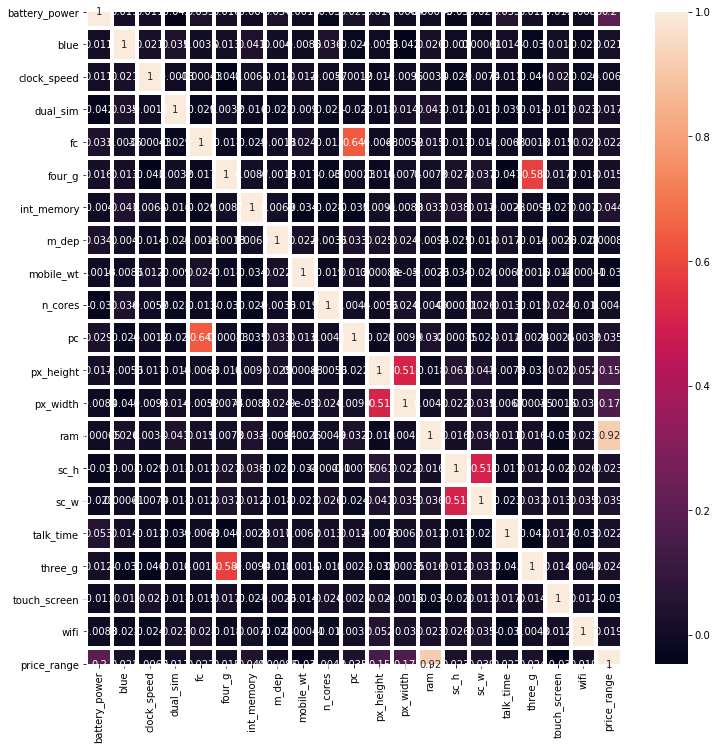

In [5]:
a= mb.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(a,annot= True,linewidths=3)

In [6]:
a

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.017185,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.005568,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.017244,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.018372,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.006322,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.015827,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.009138,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.024794,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000876,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.005603,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


#### Imputing the null values with the median of the column

In [7]:
mb.isna().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               102
px_height         20
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [8]:
mb['pc'].fillna(mb['pc'].median(), inplace = True) 

In [9]:
mb['px_height'].fillna(mb['px_height'].median(), inplace = True) 

In [10]:
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null float64
px_height        2000 non-null float64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(4), int64(17)
memory usage: 328.2 KB


#### Splitting the datset into train and test

In [11]:
from sklearn.model_selection import train_test_split
X = mb.drop('price_range',axis=1)
y = mb['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

##### Using Scaled data, the algorithm gave us the perfect model(Train Score:1.00, Test Score:1.00). 
It was difficult for us to study the model and do some analyze. So we used the unscaled data. 

### 1) KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9550
Test score: 0.9225
r_square: 0.9385 


#### Grid Search for KNN

In [13]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

knn = GridSearchCV(knn, param_grid=parameters)
knn = knn.fit(X_train, y_train)
knn.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 11}

In [36]:
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9469
Test score: 0.9400
r_square: 0.9527 


#### Fitting the model with best parameters

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm= 'auto', leaf_size = 1, n_jobs = -1, n_neighbors = 11)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9513
Test score: 0.9450
r_square: 0.9563 


#### Cross validation of KNN Model

In [15]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(knn,X_train,y_train,cv=5)
test_score_list = cross_val_score(knn,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9319
Avg Test Score:0.9150


#### KNN Visualization

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

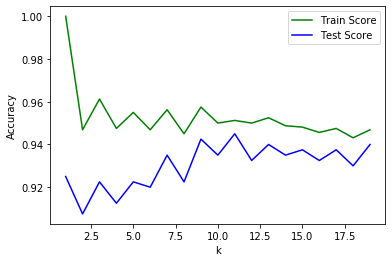

In [17]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### 2) Linear SVC

In [18]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(dual = False)
linearsvc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linearsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linearsvc.score(X_test, y_test)))
prediction = linearsvc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.8075
Test score: 0.7900
r_square: 0.8484 


#### Grid Search for LinearSVC

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}]
grid_search = GridSearchCV(estimator = linearsvc,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'penalty': 'l1'}

#### Fitting the model with best parameters

In [20]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(penalty = 'l1', C= 10, dual=False)
linearsvc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linearsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linearsvc.score(X_test, y_test)))
prediction = linearsvc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.8731
Test score: 0.8275
r_square: 0.8722 


#### Cross Validation for linearSVC

In [21]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(linearsvc,X_train,y_train,cv=5)
test_score_list = cross_val_score(linearsvc,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8400
Avg Test Score:0.7571


### 3) Logistic Regression

In [22]:
# Fitting logistic regression to the Training set
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(Log.score(X_test, y_test)))
prediction = Log.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.7994
Test score: 0.7750
r_square: 0.8345 


#### Grid Search for logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l2','l1']}]
grid_search = GridSearchCV(estimator = Log,
                           param_grid = parameters,
                           scoring = 'accuracy', cv=5, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'penalty': 'l1'}

#### Fitting model with best parameters

In [24]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(penalty = 'l1', C = 100)
Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(Log.score(X_test, y_test)))
prediction = Log.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.8900
Test score: 0.8400
r_square: 0.8769 


#### Cross Validation for logistic Regression

In [25]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(Log,X_train,y_train,cv=5)
test_score_list = cross_val_score(Log,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8587
Avg Test Score:0.7973


#### Logistic Visualization

In [26]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

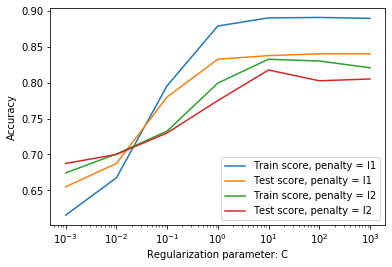

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### 4) SVC

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Train score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_test, y_test)))
prediction = svc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 1.0000
Test score: 0.2300
r_square: 0.0000 


Perfect train score with the lower test score shows that the model is highly overfitting and not suitable for this dataset

#### GridSearch for SVC

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
            {'C': [1, 10, 100], 'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5, 6]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

#### Fitting the model with best parameters

In [30]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C = 1)
svc.fit(X_train, y_train)
print('Train score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_test, y_test)))
prediction = svc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9881
Test score: 0.9850
r_square: 0.9882 


#### Cross Validation for SVC

In [31]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(svc,X_train,y_train,cv=5)
test_score_list = cross_val_score(svc,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())


Avg Train Score:0.9706
Avg Test Score:0.9675


### 5) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(decisiontree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(decisiontree.score(X_test, y_test)))
prediction = decisiontree.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 1.0000
Test score: 0.8550
r_square: 0.8872 


This model seems overfitting

#### Grid Search for Decision Tree

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = [{"max_depth": [1,2,3,4,5,6,7], "criterion": ["gini", "entropy"]}]
grid_search = GridSearchCV(estimator = decisiontree,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7}

#### Fitting the model with best parameters

In [34]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
decisiontree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(decisiontree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(decisiontree.score(X_test, y_test)))
prediction = decisiontree.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9563
Test score: 0.8900
r_square: 0.9163 


#### Cross Validation for Decision Tree

In [35]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(decisiontree,X_train,y_train,cv=5)
test_score_list = cross_val_score(decisiontree,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8313
Avg Test Score:0.7904


Conclusion:The best model for classification dataset is the Support Vector Classifier with linear Kernel and C value as 1.